In [ ]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

import numpy as np
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

print(f"Training data shape: {trainX.shape}")
print(f"Training labels shape: {trainY.shape}")
print(f"Test data shape: {testX.shape}")
print(f"Test labels shape: {testY.shape}")


trainX = trainX.astype("float32") / 255.0   # (60000, 28, 28)
testX = testX.astype("float32") / 255.0     # (10000, 28, 28)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
"""
# convert labels to OHE
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
"""

trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)         #(60000, 28, 28, 1)
testX = testX.reshape((testX.shape[0], 28, 28, 1))          #(10000, 28, 28, 1)

In [4]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
# train the model using SGD
print("[INFO] training network...")
model.compile(optimizer=SGD(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=2, batch_size=256, verbose=1)


loss, accuracy = model.evaluate(testX, testY)
print(f"loss : {loss}")
print(f"accuracy : {accuracy}")

# model.save("data/MNIST/model", save_format="tf")
# model.save(r'data/MNIST/model.h5')
model.save(r'data/MNIST/model.keras')


[INFO] training network...


NameError: name 'model' is not defined

In [6]:
y_pred = model.predict(testX)
y_pred_classes= np.argmax(y_pred,axis=1)

print("Classification Report:")
print(classification_report(testY, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.92      0.98      0.95      1135
           2       0.91      0.88      0.90      1032
           3       0.82      0.92      0.87      1010
           4       0.92      0.80      0.86       982
           5       0.94      0.74      0.83       892
           6       0.91      0.91      0.91       958
           7       0.95      0.82      0.88      1028
           8       0.86      0.83      0.84       974
           9       0.73      0.94      0.82      1009

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



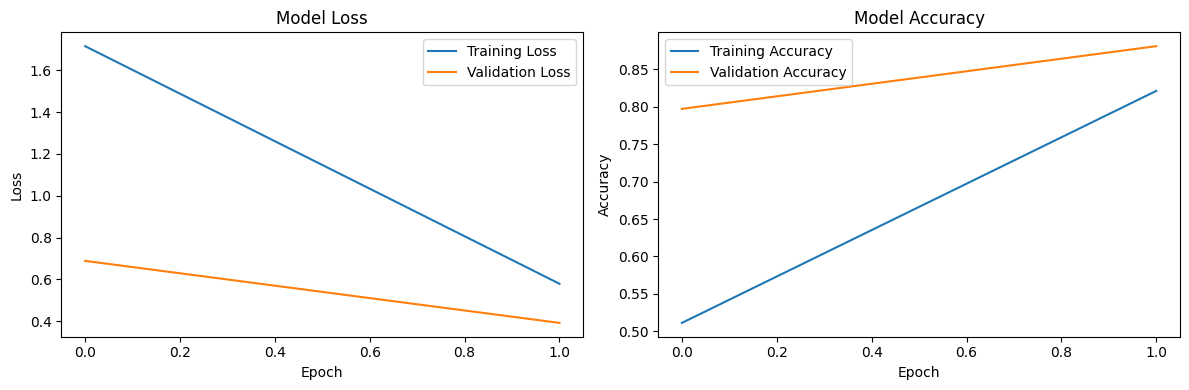

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig(r"data/MNIST/plot_MNIST.png")
